# Домашнее задание 4

In [1]:
# Импорт библиотек для работы со статистикой
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels as stm

# Импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Стиль для графиков
plt.style.use('ggplot')
%matplotlib inline

__Оценки-баллы__: 
- 1: 1
- 2: 2
- 3: 3-4
- 4: 5-6
- 5: 7-9
- 6: 10-12
- 7: 13-14
- 8: 15-16
- 9: 17
- 10: 18-30

__DL (срок сдачи ДЗ)__: 12.12.2021 23:59. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw8_9_ivanov_i_i.ipynb

### Задание 1 [20]

Набор данных ```candies.dat``` содержит оценки степени согласия (от 1 до 5 баллов) респондентов с высказываниями, отражающими цель потребления леденцов. Всего каждый респондент выставлял оценки по 11 высказываниям:

V1: Я потребляю леденцы, чтобы освежить дыхание  
V2: Я потребляю леденцы, чтобы чувствовать себя увереннее  
V3: Я потребляю леденцы, чтобы освежить полость рта  
V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту  
V5: Я потребляю леденцы как заменитель других кондитерских изделий  
V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого  
V7: Леденцы помогают мне сконцентрироваться  
V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать  
V9: Я потребляю леденцы для того, чтобы облегчить боль в горле  
V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа  
V11: Я потребляю леденцы для улучшения самочувствия  

__Задание:__ Определить число кластеров. Подобрать метод кластеризации, дающий наиболее ясные результаты. Какие леденцы пользуются популярностью у потребителей из каждого сегмента?

> __Комментарий:__ Поскольку анализируется большой набор данных, процедура может работать долго.  
__Подсказка:__ используйте аргумент ```truncate_mode='lastp'``` при построении дендрограммы

## Подготовка данных

In [2]:
X = pd.read_csv('candies.dat', sep=';')
X.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
333,3,3,3,3,3,3,5,5,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3
337,3,3,3,3,3,3,5,5,3,3,3


In [3]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
X.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
dtype: int64

Пропусков нет, невалидных значений тоже, то есть данные готовы к кластеризации.

## Кластеризация

Так как неизвестно число кластеров, рассмотрим два метода кластеризации: иерархический и DBSCAN.

### Иерархический метод

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette

ARCH = X.copy()
link_ARCH = linkage(ARCH, 'ward', 'euclidean')

In [6]:
link_ARCH

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [  1.        ,   3.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       ...,
       [664.        , 669.        ,  30.21829021, 120.        ],
       [667.        , 672.        ,  43.44161878, 230.        ],
       [671.        , 673.        ,  51.70554708, 338.        ]])

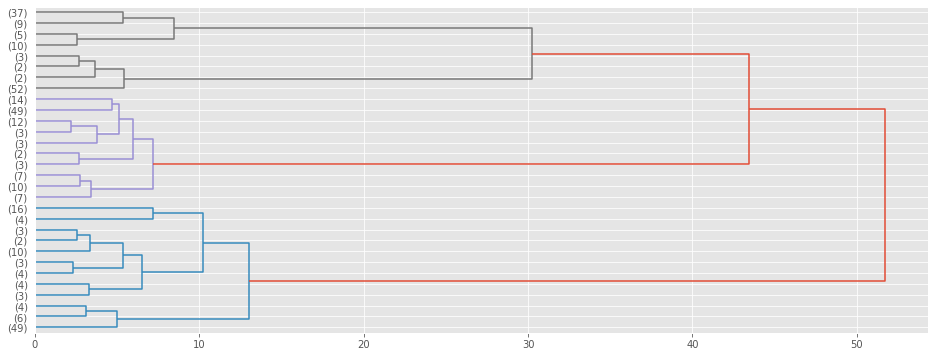

In [7]:
plt.figure(figsize=(16,6))

dn = dendrogram(link_ARCH,
                truncate_mode='lastp',
                #color_threshold=5,
                orientation = "right")

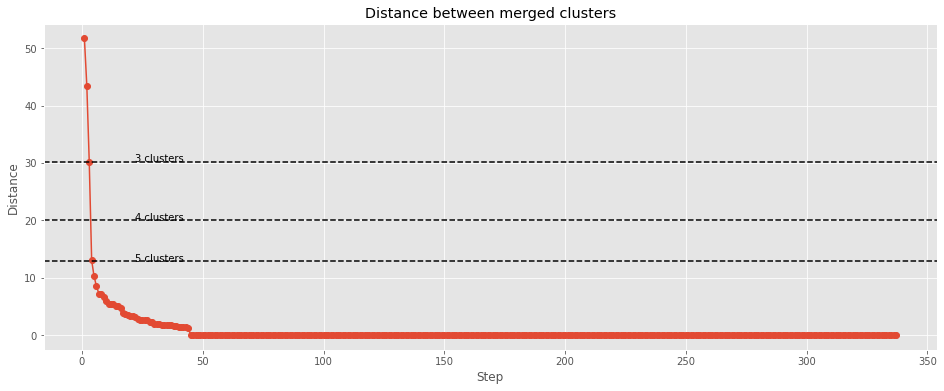

In [8]:
dist = link_ARCH[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.figure(figsize=(16,6))
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(30.2, c='k', linestyle='dashed')
plt.text(22, 30.2, '3 clusters')
plt.axhline(20, c='k', linestyle='dashed')
plt.text(22, 20, '4 clusters')
plt.axhline(12.9, c='k', linestyle='dashed')
plt.text(22, 12.9, '5 clusters');

Самое большое расстояние без изменений, когда **4 кластера**. Скорее всего это оптимальная кластеризация, посмотрим на особенности каждого кластера. 

In [9]:
ARCH['cluster'] = fcluster(link_ARCH, 20, criterion='distance')

In [10]:
ARCH.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

In [11]:
ARCH.columns=['Я потребляю леденцы, чтобы освежить дыхание',
              'Я потребляю леденцы, чтобы чувствовать себя увереннее',
              'Я потребляю леденцы, чтобы освежить полость рта',
              'Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту',
              'Я потребляю леденцы как заменитель других кондитерских изделий',
              'Я потребляю леденцы, когда мне хочется чего-нибудь сладкого',
              'Леденцы помогают мне сконцентрироваться',
              'Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать',
              'Я потребляю леденцы для того, чтобы облегчить боль в горле',
              'Я потребляю леденцы для того, чтобы избавиться от заложенности носа',
              'Я потребляю леденцы для улучшения самочувствия',
              'cluster']
clusters_ARCH = ARCH.groupby('cluster').mean().T
max_cluster = clusters_ARCH.idxmax(axis=1)
min_cluster = clusters_ARCH.idxmin(axis=1)
clusters_ARCH['max #'] = max_cluster
clusters_ARCH['min #'] = min_cluster
clusters_ARCH

cluster,1,2,3,4,max #,min #
"Я потребляю леденцы, чтобы освежить дыхание",2.824074,4.845455,3.000000,3.000000,2,1
"Я потребляю леденцы, чтобы чувствовать себя увереннее",2.833333,4.800000,2.966102,3.000000,2,1
"Я потребляю леденцы, чтобы освежить полость рта",2.768519,4.836364,2.966102,3.000000,2,1
"Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту",2.620370,4.681818,2.915254,3.000000,2,1
Я потребляю леденцы как заменитель других кондитерских изделий,2.611111,3.036364,2.915254,4.852459,4,1
"Я потребляю леденцы, когда мне хочется чего-нибудь сладкого",2.583333,3.036364,2.949153,4.852459,4,1
Леденцы помогают мне сконцентрироваться,2.750000,3.000000,4.915254,3.000000,3,1
"Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать",2.916667,2.990909,4.915254,2.918033,3,1
"Я потребляю леденцы для того, чтобы облегчить боль в горле",4.953704,3.072727,3.000000,2.754098,1,4
"Я потребляю леденцы для того, чтобы избавиться от заложенности носа",4.814815,3.045455,3.000000,2.754098,1,4


По табличке видно примерное соответствие признаков к кластеру.

**1 кластер**: леденцы как лекарственное средство;<br>
**2 кластер**: леденцы как средство гигиены;<br>
**3 кластер**: леденцы как средство повышения продуктивности;<br>
**4 кластер**: леденцы как кондитерское изделие.

### DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

SCAN = X.copy()

model = DBSCAN(eps=2)
model.fit(SCAN)

SCAN['cluster'] = model.labels_
SCAN.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
-1,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,4.750000,4.750000
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,2.855769,2.788462,2.721154,2.567308,2.634615,2.605769,2.778846,2.913462,4.951923,4.817308,4.865385
2,3.000000,2.983333,2.983333,2.958333,3.900000,3.916667,3.941667,3.900000,2.875000,2.875000,2.875000


При `eps = 2` получилось также 4 кластера.

In [13]:
SCAN.columns=['Я потребляю леденцы, чтобы освежить дыхание',
              'Я потребляю леденцы, чтобы чувствовать себя увереннее',
              'Я потребляю леденцы, чтобы освежить полость рта',
              'Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту',
              'Я потребляю леденцы как заменитель других кондитерских изделий',
              'Я потребляю леденцы, когда мне хочется чего-нибудь сладкого',
              'Леденцы помогают мне сконцентрироваться',
              'Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать',
              'Я потребляю леденцы для того, чтобы облегчить боль в горле',
              'Я потребляю леденцы для того, чтобы избавиться от заложенности носа',
              'Я потребляю леденцы для улучшения самочувствия',
              'cluster']
clusters_SCAN = SCAN.groupby('cluster').mean().T
max_cluster = clusters_SCAN.idxmax(axis=1)
min_cluster = clusters_SCAN.idxmin(axis=1)
clusters_SCAN['max #'] = max_cluster
clusters_SCAN['min #'] = min_cluster
clusters_SCAN

cluster,-1,0,1,2,max #,min #
"Я потребляю леденцы, чтобы освежить дыхание",2.00,4.845455,2.855769,3.000000,0,-1
"Я потребляю леденцы, чтобы чувствовать себя увереннее",4.00,4.800000,2.788462,2.983333,0,1
"Я потребляю леденцы, чтобы освежить полость рта",4.00,4.836364,2.721154,2.983333,0,1
"Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту",4.00,4.681818,2.567308,2.958333,0,1
Я потребляю леденцы как заменитель других кондитерских изделий,2.00,3.036364,2.634615,3.900000,2,-1
"Я потребляю леденцы, когда мне хочется чего-нибудь сладкого",2.00,3.036364,2.605769,3.916667,2,-1
Леденцы помогают мне сконцентрироваться,2.00,3.000000,2.778846,3.941667,2,-1
"Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать",3.00,2.990909,2.913462,3.900000,2,1
"Я потребляю леденцы для того, чтобы облегчить боль в горле",5.00,3.072727,4.951923,2.875000,-1,2
"Я потребляю леденцы для того, чтобы избавиться от заложенности носа",4.75,3.045455,4.817308,2.875000,1,2


По табличке видно примерное соответствие признаков к кластеру. В данном случае сложнее определить сходства.

**-1 кластер**: леденцы как средство облегчение боли в горле;<br>
**0 кластер**: леденцы как средство гигиены;<br>
**1 кластер**: леденцы как лекарственное средство;<br>
**2 кластер**: леденцы как кондитерское изделие и средство повышения продуктивности.

## Выводы

По текущим результатам более логичные кластеры получаются иерархическим методом.

Ответ - **4 кластера**:<br>
**1 кластер**: леденцы как лекарственное средство;<br>
**2 кластер**: леденцы как средство гигиены;<br>
**3 кластер**: леденцы как средство повышения продуктивности;<br>
**4 кластер**: леденцы как кондитерское изделие.

Посмотрим самые популярные признаки в каждом кластере.

In [14]:
clusters = ARCH.groupby('cluster').mean().T

for cluster in clusters.columns:
    print(f'{cluster} кластер: {clusters[cluster].idxmax()}')

1 кластер: Я потребляю леденцы для того, чтобы облегчить боль в горле
2 кластер: Я потребляю леденцы, чтобы освежить дыхание
3 кластер: Леденцы помогают мне сконцентрироваться
4 кластер: Я потребляю леденцы как заменитель других кондитерских изделий


### Задание 2 [10] - дополнительное

Используя сжатие признаков, оптимизируйте алгоритмы кластеризации с сохранением до 80% информации. Представить результаты сжатия и показать эффективность работы при сжатии (время работы алгоритма)

---
---